# Trabajo Práctico Final

# Grupo 10
### Integrantes:
- Facundo Peloso
- Eduardo Barbas
- Roberto Biancardi 
- Juan Pablo Anselmo 

El objetivo de este trabajo práctico es implementar un modelo que pueda predecir el resultado de una partida de ajedrez.

Para ello utilizaremos un dataset proporcionado por el sitio Chess.com donde están registradas casi dos millones de partidas desde el 2010 en adelante.

Estos datos describen características de los juegos como: 

La variable target elegida es el "Resultado" de la partida.

## 0. Importación de Módulos y Librerías

In [78]:
#Importacion de librerias/módulos
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from statsmodels.tools import eval_measures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn.pipeline import Pipeline

import shelve

## 1. Lectura de Datos y Visualización

In [2]:
#Establezco la dirección del archivo
file_location="twic_master.csv"

#Leo el data set usando la librería pandas y se almacena en el objeto Dataframe llamado datos_crudos  
datos_crudos=pd.read_csv(file_location, index_col=0)

c:\Users\fpeloso\Anaconda3\envs\dhdsblend2021\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (10,13,14,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\Users\fpeloso\Anaconda3\envs\dhdsblend2021\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
#Visualizamos los primeros registros del dataset
datos_crudos.head()

,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
twic_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1260,"Tukhaev,A","Carlsen,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,1.41095e+07,1.50301e+06,2527.0,2835.0,"Pelikan, Chelyabinsk variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260,"Nakamura,Hi","Teske,H",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2.01619e+06,4.6115e+06,2746.0,2483.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260,"Tari,A","Artemiev,V",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,1.51004e+06,2.41016e+07,2620.0,2709.0,"Canal-Sokolsky attack, 3...Bd7",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,2.41307e+07,4.11534e+06,2719.0,2592.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260,"Hovhannisyan,R","Aronian,L",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,1.33025e+07,1.33005e+07,2637.0,2765.0,"two knights, Suttles variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("El tamaño del dataset original es de:")
datos_crudos.shape

El tamaño del dataset original es de:


(1971319, 28)

In [5]:
#Listamos todas las columnas del dataset
datos_crudos.columns

Index(['White', 'Black', 'Date', 'EventDate', 'Event', 'Result',
       'mainline_moves', 'Site', 'Online', 'Round', 'ECO', 'Opening',
       'WhiteFideId', 'BlackFideId', 'WhiteElo', 'BlackElo', 'Variation',
       'WhiteTitle', 'BlackTitle', 'WhiteTeam', 'BlackTeam', 'EventType',
       'FEN', 'SetUp', 'Variant', 'Board', 'PlyCount', 'EventCategory'],
      dtype='object')

In [6]:
#Vemos cuales son las columnas del dataset y que tipo de datos almacenan
display(datos_crudos.iloc[:,0:14].info(verbose=True, null_counts=True))

display(datos_crudos.iloc[:,14:28].info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971319 entries, 1260 to 980
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   White           1971319 non-null  object
 1   Black           1971318 non-null  object
 2   Date            1971319 non-null  object
 3   EventDate       1970321 non-null  object
 4   Event           1971319 non-null  object
 5   Result          1971319 non-null  object
 6   mainline_moves  1960398 non-null  object
 7   Site            1971319 non-null  object
 8   Online          1971319 non-null  bool  
 9   Round           1971319 non-null  object
 10  ECO             1962469 non-null  object
 11  Opening         1955315 non-null  object
 12  WhiteFideId     1945672 non-null  object
 13  BlackFideId     1945382 non-null  object
dtypes: bool(1), object(13)
memory usage: 212.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971319 entries, 1260 to 980
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   WhiteElo       1901715 non-null  float64
 1   BlackElo       1900345 non-null  float64
 2   Variation      1283715 non-null  object 
 3   WhiteTitle     1221853 non-null  object 
 4   BlackTitle     1214242 non-null  object 
 5   WhiteTeam      384771 non-null   object 
 6   BlackTeam      384769 non-null   object 
 7   EventType      192262 non-null   object 
 8   FEN            550 non-null      object 
 9   SetUp          543 non-null      float64
 10  Variant        541 non-null      object 
 11  Board          128 non-null      float64
 12  PlyCount       10 non-null       float64
 13  EventCategory  0 non-null        float64
dtypes: float64(6), object(8)
memory usage: 225.6+ MB


None

## 1.1 Descripción de los Campos

- White
- Black
- Date
- EventDate
- Result
- mainline_moves
- Site
- Online
- Round
- ECO
- Opening
- WhiteFideId
- BlackFideId
- WhiteElo
- BlackElo
- Variation
- WhiteTitle
- BlackTitle
- WhiteTeam
- BlackTeam
- EventType
- FEN
- Variant
- Board
- PlyCount
- EventCategory

## 2. Limpieza y Preprocesamiento de Datos

### 2.1 Se retiran columnas innecesarias que se considera no aportan información predictiva al modelo y/o tienen mayoritariamente valore nulo 


In [7]:
# PlyCount , Board y EventCategory tiene altísimos porcentajes de valores nulos
# BlackTeam y WhiteTeam indican a que equipo pertenecía el jugador en caso de ser un torneo por equipos
# Se considera que no tiene valor predictivo ya que el partido en sí es entre dos individuos
datos_crudos = datos_crudos.drop(["PlyCount", "Board", "EventCategory", "White", "Black","BlackTeam", "WhiteTeam",'WhiteTitle','BlackTitle','ECO','Site','Round','Online'], axis=1)

### 2.2 Las columnas Variant, FEN y Setup corresponden a juegos de "Ajedrez 960". 
Como es una variación del juego que incluye un orden aleatorio de las piezas, no lo incluimos en el modelo. 

Primero filtramos lo registros correpondientes a dichos juegos y luego eliminamos las columnas

In [8]:
# Primero me quedo solo con los registros nulos en las columnas relacionadas con la modalidad 960
# De este modo me voy a quedar con las partidas que NO son Ajedrez 060
datos_crudos = datos_crudos[ (datos_crudos.Variant.isna()) & (datos_crudos.FEN.isna()) & (datos_crudos.SetUp.isna()) ]

# Despues tiro estas columnas que ya no me dicen nada
datos_crudos = datos_crudos.drop(["Variant", "FEN", "SetUp"], axis=1)

Luego de eliminar los registros y columnas en el paso anterior. Volvemos a ver la dimensión del dataset

In [9]:
print("Tamaño del Dataset:")
display(datos_crudos.shape)
datos_crudos.columns

Tamaño del Dataset:


(1970769, 12)

Index(['Date', 'EventDate', 'Event', 'Result', 'mainline_moves', 'Opening',
       'WhiteFideId', 'BlackFideId', 'WhiteElo', 'BlackElo', 'Variation',
       'EventType'],
      dtype='object')

### 2.3 Pasamos los registro de texto a letras minúsculas. Con la excepción "mainline_moves" donde la notación es "case-sensitive"

In [10]:
# Vamos a poner todas las letras en minuscula y eliminar espacios en los extremos
# En "mainline_moves" y "ECO" NO toco las mayúsculas ya tienen relevancia en la notación.
cols = ["Event", "Opening", "Variation", "EventType"]
for feature in cols:
    
    datos_crudos[feature] = datos_crudos[feature].str.lower().str.strip()

### 2.4 La columna "Date" es un string, creamos una nueva columna fecha con el formato de pandas "datetime"

In [11]:
datos_crudos["Fecha"] = pd.to_datetime(datos_crudos["Date"])

Visualizamos las fechas de las partidas en un histograma

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 6.00000e+00, 5.40000e+01, 5.48860e+04, 1.11163e+05,
        1.08854e+05, 1.25766e+05, 1.19212e+05, 1.28546e+05, 1.34640e+05,
        1.35869e+05, 1.62709e+05, 1.59872e+05, 1.83307e+05, 2.58343e+05,
        2.41990e+05, 4.55490e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 6896.  ,  7196.36,  7496.72,  7797.08,  8097.44,  8397.8 ,
         8698.16,  8998.52,  9298.88,  9599.24,  9899.6 , 10199.96,
        10500.32, 10800.68, 11101.04, 11401.4 , 11701.76, 12002.12,
        12302.48, 12602.84, 12903.2 , 13203.56, 13503.92, 13804.

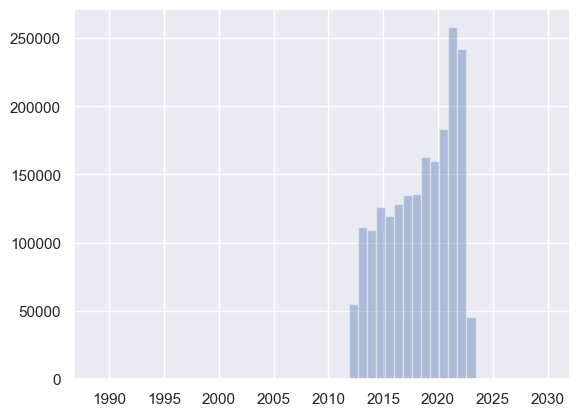

In [12]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.hist(datos_crudos['Fecha'], label='fechas', alpha = 0.4,bins=50)

Observamos que hay outliers en las fechas. Los visualizamos con utilizando una máscara en la columna de fechas

In [13]:
print(datos_crudos['Fecha'].loc[datos_crudos['Fecha'].dt.year<2010])

twic_number
936   2005-10-07
951   1988-11-18
Name: Fecha, dtype: datetime64[ns]


Filtramos las fechas previas al 2010

In [14]:
#Filtramos las fechas previas al 2010
datos_crudos=datos_crudos.loc[datos_crudos['Fecha'].dt.year>2010]

(array([5.40000e+01, 1.10000e+01, 4.47760e+04, 5.12690e+04, 4.24340e+04,
        6.40160e+04, 4.51020e+04, 4.63850e+04, 6.31780e+04, 4.99160e+04,
        5.57540e+04, 5.25840e+04, 4.39300e+04, 6.89600e+04, 5.87410e+04,
        4.68960e+04, 8.00830e+04, 6.60390e+04, 6.38110e+04, 7.13940e+04,
        6.53210e+04, 8.34790e+04, 6.14920e+04, 5.23200e+04, 1.07725e+05,
        1.03322e+05, 1.13762e+05, 1.12261e+05, 9.94350e+04, 1.19606e+05,
        3.67040e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([15179. , 15313.7, 15448.4, 15583.1, 15717.8, 15852.5, 15987.2,
        16121.9, 16256.6, 16391.3, 16526. , 16660.7, 16795.4, 16930.1,
        17064.8, 17199.5, 17334.2, 17468.9, 17603.6, 17738.3, 17873. ,
        18007.7, 18142.4, 18277.1, 18411.8, 18546.5, 18

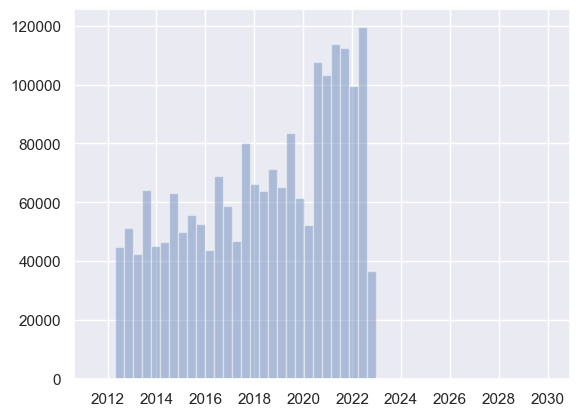

In [15]:
#Volvemos a visualizar
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.hist(datos_crudos['Fecha'], label='fechas', alpha = 0.4,bins=50)

### 2.5 Visualizamos y limpiamos la columna Target: Resultados

In [16]:
datos_crudos['Result'].value_counts()

1-0        804252
0-1        664268
1/2-1/2    502189
*              15
+/-            10
0-0             9
-/+             7
-               5
1-0 ff          2
1-O             1
1/2 1/2         1
(+)-(-)         1
00-1            1
Name: Result, dtype: int64

"1-0" es una victoria para Blancas, "0-1" es una victoria para Negras y "1/2-1/2" es un Empate.

Realizamos un apply para simplificar la notación y dejar en NaN todos los demas registros que no coincidan con esta notación

In [17]:
#Definimos una función que se aplicará sobre cada registro
def limpiar_resultado(x):
    if x=='1-0':
        return 0
    elif x=='0-1':
        return 1
    elif x=='1/2-1/2':
        return 2
    else: 
        return np.NaN
 
# Aplicamos la función y creamos la columna Resultado
datos_crudos['Resultado'] = datos_crudos['Result'].apply(limpiar_resultado)

In [18]:
#Vemos como quedo
datos_crudos['Resultado'].value_counts()

0.0    804252
1.0    664268
2.0    502189
Name: Resultado, dtype: int64

### 2.6 Generamos la columna de cantidad de movimientos
Utilizamos la columna "mainline_moves", dónde se detallan todos los movimientos del partido, para crear una nueva columna dónde se indique la cantidad de movimientos en total que duró la partida

In [19]:
datos_crudos['mainline_moves'].iloc[5]

'1. d4 f5 2. c4 Nf6 3. Nc3 e6 4. e3 b6 5. d5 Bd6 6. g3 Bb7 7. Bg2 O-O 8. Nge2 Na6 9. O-O c6 10. b3 Nc7 11. dxc6 dxc6 12. Nd4 Qd7 13. Bb2 g6 14. Ncb5 Nxb5 15. cxb5 Ne4 16. bxc6 Bxc6 17. Nxc6 Qxc6 18. Rc1 Qd5 19. Qxd5 exd5 20. Rfd1 Rac8 21. Bxe4 Rxc1'

El string tienen el formato de:  "N° de Mov". "Mov.Blanca" Mov.Negra". Aplicamos una función a cada registro para contar la cantidad de movimientos

In [20]:
#Definimos una función que primero retira los espacios en blanco y luego separamos el string por el caracter '.' 
#almacena los strings separados en una serie y cuenta la cantidad de elementos que tiene
def cant_mov(x):
    if type(x) is str:
        return len(x.replace(" ", "").split('.'))
    else:
        return np.NaN
# Aplico la función y creo una nueva columna llamada "Duración"
datos_crudos['Duración'] = datos_crudos['mainline_moves'].apply(cant_mov)

### 2.7 Filtramos aquellas partidas dónde el Control de Tiempo haya sido Blitz (3 minutos) y/o Rapid (5 minutos).
En estas partidas con menor tiempo de juego, la diferencia de puntuación entre jugadores es un factor más determinante en el resultado final del juego.

Las columnas Event y EventType son las que tienen información sobre el tipo de control de tiempo utilizado.

In [21]:
# Creamos un nuevo dataframe filtrando si las columnas Event y EventType tiene la palabra blitz y/o rapid
datos_bz_rp=datos_crudos[(datos_crudos.Event.str.contains("blitz")) | (datos_crudos.EventType.str.contains("blitz"))|(datos_crudos.Event.str.contains("rapid")) | (datos_crudos.EventType.str.contains("rapid"))]

In [22]:
print("Tamaño del dataset de partidas Blitz y Rapid:")
datos_bz_rp.shape

Tamaño del dataset de partidas Blitz y Rapid:


(181540, 15)

### 2.8 Visualizamos y limpiamos los valores de la columna Opening
Esta columna indica la apertura elegida por blancas. Esto determina el tipo de estrategia que seguirá la partida, si es mas agresiva o conservadora, posicionas mas o menos balanceades, etc.

In [23]:
#Vemos las aperturas más utilizadas
datos_bz_rp.Opening.value_counts().head(20)

sicilian                                        26807
french                                           8804
king's indian                                    8275
queen's pawn game                                8114
qgd                                              7541
ruy lopez                                        7442
caro-kann                                        7258
english                                          7154
reti                                             5310
reti opening                                     5276
english opening                                  5038
sicilian defence                                 4800
queen's pawn                                     4134
nimzo-indian                                     3684
qgd slav                                         3407
queen's indian                                   2171
giuoco piano                                     2163
gruenfeld                                        2150
catalan                     

Vamos a limpiar los valores repetidos la columna y categorizar a todas a las aperturas fuera del top 20 como "otras"

In [24]:
def limpiar_opening(x):
    if "sicilian" in str(x):
        return "sicilian"
    elif "english" in str(x):
        return "english"
    elif "reti" in str(x):
        return "reti"
    elif "qgd" in str(x):
        return "qgd"
    else: 
        return x
 
# Aplicamos la función 
datos_bz_rp['Apertura'] = datos_bz_rp['Opening'].apply(limpiar_opening)

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_5152\1016428220.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_bz_rp['Apertura'] = datos_bz_rp['Opening'].apply(limpiar_opening)


In [25]:
#Vemos las aperturas más utilizadas luego de haber corregido las repetidas en el top 20
datos_bz_rp.Apertura.value_counts().head(20)

sicilian                                        32324
qgd                                             14010
english                                         12996
reti                                            10966
french                                           8804
king's indian                                    8275
queen's pawn game                                8114
ruy lopez                                        7442
caro-kann                                        7258
queen's pawn                                     4134
nimzo-indian                                     3684
queen's indian                                   2171
giuoco piano                                     2163
gruenfeld                                        2150
catalan                                          2092
trompovsky attack (ruth, opovcensky opening)     1897
nimzovich-larsen attack                          1859
robatsch (modern) defence                        1684
pirc                        

Ponemos un umbral de 2000 registros para las aperturas. Aquellas que tengan menos de 2000, serán categorizadas
como "other"

In [26]:
#Aquellas Aperturas que tenga menos de 2000 registros, las clasifico como 'other'
datos_bz_rp['Apertura']=datos_bz_rp.Apertura.where(datos_bz_rp['Apertura'].map(datos_bz_rp['Apertura'].value_counts()).gt(2000),'other')

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_5152\4216729748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_bz_rp['Apertura']=datos_bz_rp.Apertura.where(datos_bz_rp['Apertura'].map(datos_bz_rp['Apertura'].value_counts()).gt(2000),'other')


In [27]:
datos_bz_rp['Apertura'].value_counts()

other                54957
sicilian             32324
qgd                  14010
english              12996
reti                 10966
french                8804
king's indian         8275
queen's pawn game     8114
ruy lopez             7442
caro-kann             7258
queen's pawn          4134
nimzo-indian          3684
queen's indian        2171
giuoco piano          2163
gruenfeld             2150
catalan               2092
Name: Apertura, dtype: int64

Verificamos por última vez las columnas que ya no son necesarias para nuestro luego de haber limpiado el dataset

In [28]:
datos_bz_rp.columns

Index(['Date', 'EventDate', 'Event', 'Result', 'mainline_moves', 'Opening',
       'WhiteFideId', 'BlackFideId', 'WhiteElo', 'BlackElo', 'Variation',
       'EventType', 'Fecha', 'Resultado', 'Duración', 'Apertura'],
      dtype='object')

### 2.9 Removemos las columnas que ya no vamos a utilizar: Date, EventDate, Fecha, Variation, mainline_moves, Result y Opening

In [29]:
datos_bz_rp=datos_bz_rp.drop(columns=['Date','EventDate','Fecha','Variation','mainline_moves','Result','Opening'])

In [30]:
datos_bz_rp.columns

Index(['Event', 'WhiteFideId', 'BlackFideId', 'WhiteElo', 'BlackElo',
       'EventType', 'Resultado', 'Duración', 'Apertura'],
      dtype='object')

### 2.10 Reseteamos el Index 

In [31]:
datos_bz_rp=datos_bz_rp.reset_index(drop=True)

### 2.11 Separamos en Blitz por un lado y Rapid por el otro

In [32]:
# Hagamos un df con partidas blitz
datos_blitz = datos_bz_rp[(datos_bz_rp.Event.str.contains("blitz")) | (datos_bz_rp.EventType.str.contains("blitz"))]
datos_blitz.shape

(104576, 9)

In [33]:
# Hagamos un df con partidas blitz
datos_rapid = datos_bz_rp[(datos_bz_rp.Event.str.contains("rapid")) | (datos_bz_rp.EventType.str.contains("rapid"))]
datos_rapid.shape

(77040, 9)

### 2.12 Eliminamos las columnas Event y EventType luego de separa en Blitz y Rapid

In [34]:
datos_blitz=datos_blitz.drop(columns=['Event', 'EventType'])

datos_rapid=datos_rapid.drop(columns=['Event', 'EventType'])

### 2.13 Eliminamos Registros que tengan algun valor nulo

In [35]:
data=datos_blitz.dropna(axis=0)

Asi quedaron las columnas finales que serán las features y target de nuestro modelo

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90882 entries, 2244 to 181363
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WhiteFideId  90882 non-null  object 
 1   BlackFideId  90882 non-null  object 
 2   WhiteElo     90882 non-null  float64
 3   BlackElo     90882 non-null  float64
 4   Resultado    90882 non-null  float64
 5   Duración     90882 non-null  float64
 6   Apertura     90882 non-null  object 
dtypes: float64(4), object(3)
memory usage: 5.5+ MB


# 3. Definimos Features y Target del Modelo

### 3.1 Definimos X e Y

In [37]:
X= data.drop(columns='Resultado')
y=data.Resultado

### 3.2 Implementamos Variables Dummies

Hacemos variables dummies de las columnas Apertura, WhiteFideId y BlackFideId

In [38]:
X_dum=pd.get_dummies(data=X,columns=['Apertura','WhiteFideId','BlackFideId'])

Vemos cuantos columnas dummies se crearon

In [39]:
X_dum.shape

(90882, 15342)

Al hacer dummies de todos los jugadores se crean más de 15 mil, lo cual es demasiado. Para reducir ese número vamos a determinar un umbral de mínimos juegos registrados para tener en cuenta el Id del jugador

In [40]:
# Vamos a hacer dummies de los IDs de los jugadores que tengan mas de "N" partidas en el dataframe
# Lo implementamos mediante una función que recibe las features "X" y el número de partidas mínimas "N".
def OHE_ID(X, N):

    #almaceno la lista de partidas por cada id en un auxiliar
    frecw = X.WhiteFideId.value_counts()
    #almaceno el índice de dicha lista
    idw = set(frecw[frecw>N].index)

    #mismo proceso para las piezas negras
    frecb = X.BlackFideId.value_counts()
    idb = set(frecb[frecb>N].index)

    #un nuevo índice que es la unión de los dos anteriores
    ids = (idw | idb)

    print(f"Son {len(ids)} jugadores los que tienen más de {N} juegos con negras o blancas")

    # Veamos cuantas partidas participan estos jugadores
    partidas = (X[(X.WhiteFideId.isin(ids)) | (X.BlackFideId.isin(ids))].shape[0])
    print(f"Estos jugadores aparecen en {partidas} registros ")

    # Ahora creo dos columnas con los ids para blancas y negras, en donde
    # a los jugadores que no tengan la presencia deseada les quedará un
    # ID = -1

    X["IDW"] = X.WhiteFideId.apply(lambda x: x if x in ids else -1 )
    X["IDB"] = X.BlackFideId.apply(lambda x: x if x in ids else -1 )

    # Hago las dummies
    X = pd.get_dummies(X, columns=['IDW', 'IDB'], prefix=["W", "B"], prefix_sep='')

    # Dropeo columnas de IDs originales:
    X = X.drop(["WhiteFideId", "BlackFideId"], axis=1)

    #hago dummies de las aperturas
    X=pd.get_dummies(data=X,columns=['Apertura'])

    return X


In [41]:
X=OHE_ID(X,100)

Son 155 jugadores los que tienen más de 100 juegos con negras o blancas
Estos jugadores aparecen en 36607 registros 


Ahora nos quedan 331 columnas luego de implementar dummies

In [42]:
X.shape

(90882, 331)

### 3.3 Separamos en Test y Train

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

Vemos la distribución de nuestro Target en Test

In [44]:
y_test.value_counts()/y_test.size

0.0    0.446938
1.0    0.386202
2.0    0.166859
Name: Resultado, dtype: float64

Partimos de una Hipótesis Nula de que el 44% de las veces ganan las piezas blancas.

# 4. Pipeline

Implementamos un pipeline +GridSearch para determinar el mejor modelo y mejores parámetros

In [45]:
#pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]


In [46]:
#pipe_grid = Pipeline(pasos)

In [47]:
#folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [48]:
#param_grid = {'knn__n_neighbors':range(2,20,2),'knn__weights':['uniform','distance']}

In [49]:
#grid = GridSearchCV(pipe_grid, param_grid, cv=folds)
#grid.fit(X_train, y_train)

# 5. Implementación de Modelos

### 5.1 Definimos función para visualizar resultados

In [ ]:
# Esta funcion toma los sets (X_test, y_test) y la predicción y_pred de un modelo
# Para entregar gráficas y métricas de score

def GRAFICAS(X_test, y_test, y_pred):
    
    y_test = pd.Series(y_test)
    y_pred = pd.Series(y_pred, index=y_test.index)
    
    c = confusion_matrix(y_test, y_pred) # mostramos la matriz de confusion
    plt.figure(figsize=(4  ,4))
    ax= plt.subplot()
    sns.heatmap(c, annot=True, fmt="d")
    ax.set_xlabel('Resultados predecidos')
    ax.set_ylabel('Resultados del test')
    ax.xaxis.set_ticklabels(['B(0)', 'N(1)', "T(2)"])
    ax.yaxis.set_ticklabels(['B(0)', 'N(1)', "T(2)"])
    ax.set_title('Matriz de Confusión')
    plt.show()
    

    print(f"El accuracy global del modelo es {accuracy_score(y_test, y_pred)}.")

    # Me armo un df de scores para cada resultado
    scores = pd.DataFrame({"Resultado":range(3),
                         "sensibilidad":pd.Series(recall_score(y_test, y_pred, average=None)),
                         "precisión":pd.Series(precision_score(y_test, y_pred, average=None)),
                         "f1":pd.Series(f1_score(y_test, y_pred, average=None))})
    scores.index.name='Resultado'
    print(f"\n\nEstos son los scores para cada resultado")

    display(scores.loc[:,"sensibilidad":].transpose().round(3))
    
    # hacemos un melt sobre Resultados para graficar
    df = scores.melt("Resultado", var_name='scores', value_name='Scores')
    # graficamos los scores para cada resultado
    sns.catplot(x="Resultado", y="Scores", hue='scores', data=df, kind='point')
    #plt.savefig(f"tp3_{type(modelo)}.png")
    plt.show()

    # Mostremos los errores cometidos
    err = y_test != y_pred # Hacemos una mascara de errores

    print(f"\n\nEstos son los errores de sensado (resultado mal identificado) y los errores de presición (resultado mal asignado):") 

    err1 = pd.DataFrame({"Mal sensado":y_test[err].value_counts(), "Mal predecido":y_pred[err].value_counts()})
    tot1 = err1["Mal sensado"].sum()
    tot2 = err1["Mal predecido"].sum()
    err1.loc["Total"] = [tot1,tot2]
    err1.index.name='Resultado'
    display(err1.transpose())

    # Un dataframe de errores:
    errores = pd.DataFrame({"y_test":y_test[err], "y_pred":y_pred[err]})
    errores["frecuencia"] = errores.apply(lambda x: c[x.y_test,x.y_pred] ,axis=1)
    errores = errores.sort_values(by=["frecuencia",'y_test', 'y_pred'],ascending=[False,False,False])

    print(f"\n\nAquí se muestra la frecuencia de cada uno de los {errores.shape[0]} errores cometidos:")
    display (errores.drop_duplicates().set_index('frecuencia').transpose())
 
    # Y para finalizar graficamos los errores de predicción,
    # con la perspectiva puesta en Los Elos, que son nuestros
    # mejores predictores
    X_test["Errores de Sensibilidad"] = y_test    
    X_test["Errores de Precisión"] = y_pred
    
    print("\n\nEstos son los errores de recall:")
    sns.pairplot(X_test[err], vars=['WhiteElo', 'BlackElo'], hue = "Errores de Sensibilidad", plot_kws={"s": 3})
    plt.show()

    # Acá se va a ver cómo los modelos predicen empates sólo para los jugadores de mayor Elo.
    print("\n\nEstos son los errores de precisión:")
    sns.pairplot(X_test[err], vars=['WhiteElo', 'BlackElo'], hue = "Errores de Precisión", plot_kws={"s": 3})
    plt.show()

Regresion Logistica

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000, random_state=1)

lr.fit(X_train, y_train) 

ypred_lr_train = lr.predict(X_train)
ypred_lr_test = lr.predict(X_test)


In [51]:
metrics.confusion_matrix(y_train, ypred_lr_train)

array([[24233,  7284,   978],
       [ 9889, 17346,   845],
       [ 6561,  4452,  1117]], dtype=int64)

In [52]:
metrics.accuracy_score(y_train,ypred_lr_train)

0.5872498452651125

In [53]:
metrics.accuracy_score(y_test,ypred_lr_test)

0.5901964020465423

In [54]:
metrics.recall_score(y_test, ypred_lr_test, average='macro')

0.48944386080110247

In [55]:
metrics.precision_score(y_test, ypred_lr_test, average='macro')

0.531289584340255

In [56]:
metrics.f1_score(y_test, ypred_lr_test, average='macro')

0.4787195664129642

In [57]:
metrics.confusion_matrix(y_test, ypred_lr_test)

array([[6082, 1779,  263],
       [2471, 4337,  212],
       [1667, 1057,  309]], dtype=int64)

Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)


ypred_gnb_train = gnb.predict(X_train)


ypred_gnb_test = gnb.predict(X_test)

In [59]:
metrics.confusion_matrix(y_train, ypred_gnb_train)

array([[ 4966, 22318,  5211],
       [ 1842, 22153,  4085],
       [ 1206,  6898,  4026]], dtype=int64)

In [60]:
metrics.confusion_matrix(y_test, ypred_gnb_test)

array([[1185, 5611, 1328],
       [ 488, 5559,  973],
       [ 294, 1761,  978]], dtype=int64)

In [61]:
print('acuracy', metrics.accuracy_score(y_test,ypred_gnb_test))
print('recall',metrics.recall_score(y_test, ypred_gnb_test, average='macro'))
print('precision',metrics.precision_score(y_test, ypred_gnb_test, average='macro'))
print('f1',metrics.f1_score(y_test, ypred_gnb_test, average='macro'))

acuracy 0.42482257798316553
recall 0.42006582168230916
precision 0.44353302529872485
f1 0.36733799350938057


### Knn

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Hyperparametros
parameters_knn = {"n_neighbors" : list(range(1, 15))}

clf_knn = GridSearchCV(knn, 
                   param_grid = parameters_knn, 
                   refit = True, 
                   cv = 3,
                   verbose=1,
                   n_jobs = -1)
                   

# Fit el modelo ya seleccionado
clf_knn.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  5.2min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             verbose=1)

In [63]:
print("Los mejores parametros fueron %s con un score de %0.2f" % (clf_knn.best_params_, clf_knn.best_score_))

Los mejores parametros fueron {'n_neighbors': 14} con un score de 0.57


In [64]:
ypred_knn_train = clf_knn.predict(X_train)
ypred_knn_test = clf_knn.predict(X_test)

In [65]:
print('acuracy', metrics.accuracy_score(y_test,ypred_knn_test))
print('recall',metrics.recall_score(y_test, ypred_knn_test, average='macro'))
print('precision',metrics.precision_score(y_test, ypred_knn_test, average='macro'))
print('f1',metrics.f1_score(y_test, ypred_knn_test, average='macro'))

acuracy 0.5733619409143423
recall 0.48114611039768135
precision 0.5168117211065445
f1 0.47521457273310563


In [66]:
tree_model = tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=6, random_state=50)
tree_model.fit(X_train, y_train)

y_train_tree_predict = tree_model.predict(X_train)
y_test_tree_predict = tree_model.predict(X_test)

print('resultados de train')
print(accuracy_score(y_train, y_train_tree_predict))
print(confusion_matrix(y_train, y_train_tree_predict))

print('resultados de test')
print(accuracy_score(y_test, y_test_tree_predict))
print(confusion_matrix(y_test, y_test_tree_predict))

resultados de train
0.5873186163262499
[[24009  8235   251]
 [ 9966 17888   226]
 [ 6815  4511   804]]
resultados de test
0.5857952357374704
[[5994 2073   57]
 [2499 4457   64]
 [1735 1101  197]]


In [67]:
from sklearn.ensemble import BaggingClassifier

bagging_tree = tree.DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=bagging_tree, n_estimators=100,
                                bootstrap=True, n_jobs=1, random_state=50)
bagging_clf.fit(X_train, y_train)

print(accuracy_score(y_train, bagging_clf.predict(X_train)))
print(confusion_matrix(y_train, bagging_clf.predict(X_train)))

print(accuracy_score(y_test, bagging_clf.predict(X_test)))
print(confusion_matrix(y_test, bagging_clf.predict(X_test)))

0.9993948146619902
[[32479    11     5]
 [   11 28066     3]
 [    9     5 12116]]
0.5718215327061671
[[5481 2118  525]
 [2312 4224  484]
 [1327 1017  689]]


In [68]:
from xgboost.sklearn import XGBClassifier
model_xg = XGBClassifier(n_jobs=-1, use_label_encoder=False)

In [69]:
from sklearn.model_selection import GridSearchCV
params = {  
    "n_estimators": [20,50,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}

In [70]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [71]:
xgb = GridSearchCV(model_xg, param_grid=params, cv=cv, verbose=1, n_jobs=-1)

In [72]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 162.3min finished


[10:06:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missin...otone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
      

In [73]:
xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}

In [74]:
def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [75]:
evaluar_rendimiento(xgb.best_estimator_,"XG Boost", X_train, y_train, cv)

Rendimiento de XG Boost:	0.6 ± 0.003


In [76]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [77]:
print(accuracy_score(y_test, xgb.best_estimator_.predict(X_test)))
print(confusion_matrix(y_test, xgb.best_estimator_.predict(X_test)))

0.6018594927655829
[[5929 1910  285]
 [2286 4482  252]
 [1446 1058  529]]


# 6. Almacenamos modelos entrenados en Shelve

In [79]:
models = shelve.open('modelos.db')

models['reg_log']=lr
models['gaussian']=gnb
models['knn']=clf_knn
models['arbol']=tree_model
models['bagging_arbol']=bagging_clf
models['xgboosted']=xgb


models.close()

S